In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/Raghu Gowda/Desktop/Skillathon Assignments/Clustering (Breast Cancer data Set)/data.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df1= df.drop(['id','Unnamed: 32'], axis='columns')

In [5]:
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [7]:
std_scaler = StandardScaler()


independent_variable = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                        'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_worst',
                        'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                        'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

dependent_variable = ['diagnosis']

x = df1.loc[:,independent_variable].values # seperating independent variables

y = df.loc[:, dependent_variable].values # seperating dependent variable ie y

In [8]:
# Standardizing the X
X = std_scaler.fit_transform(x)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principle_component_analysis = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principle_component_analysis, columns=['principal component 1', 'principal component 2'])

In [10]:
pca_df

,principal component 1,principal component 2
0,7.892437,3.177473
1,2.624204,-3.307307
2,5.249249,-0.784665
3,6.628242,10.222789
4,3.136999,-2.283193
...,...,...
564,4.915406,-3.434990
565,3.290318,-3.680924
566,1.005277,-2.348694
567,10.034646,1.960144


In [11]:
#Concating independent and dependent data

y_df = pd.DataFrame(data=y, columns=['diagnosis'])

df2 = pd.concat([pca_df,y_df], axis='columns')

In [12]:
df2

,principal component 1,principal component 2,diagnosis
0,7.892437,3.177473,M
1,2.624204,-3.307307,M
2,5.249249,-0.784665,M
3,6.628242,10.222789,M
4,3.136999,-2.283193,M
...,...,...,...
564,4.915406,-3.434990,M
565,3.290318,-3.680924,M
566,1.005277,-2.348694,M
567,10.034646,1.960144,M


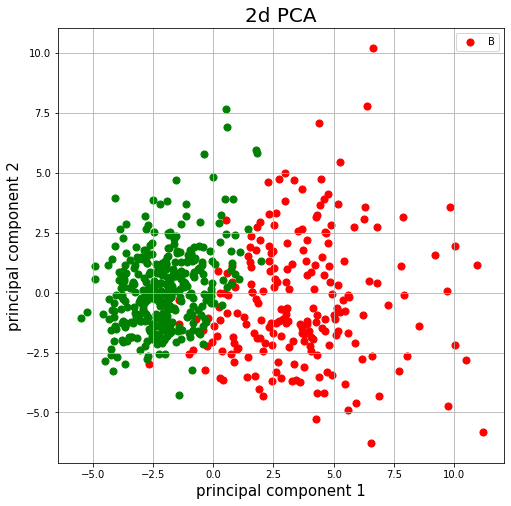

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2d PCA', fontsize = 20)
diagnosis = ['M', 'B']
colors = ['r', 'g']
for diagnosis, color in zip(diagnosis,colors):
    indicesToKeep = df2['diagnosis'] == diagnosis
    ax.scatter(df2.loc[indicesToKeep, 'principal component 1']
               , df2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(diagnosis)
ax.grid()

Text(0, 0.5, 'principal component2')

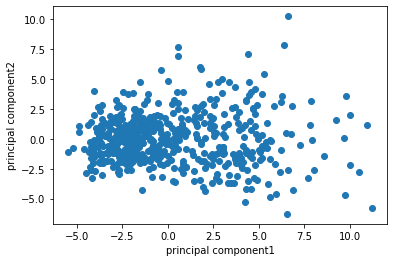

In [21]:
# ploting scatter plot
plt.scatter(df2['principal component 1'], df2['principal component 2'])
plt.xlabel('principal component1')
plt.ylabel('principal component2')

# Now Apply K mean clustering

In [59]:
km =KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
y_predicted= km.fit_predict(df2[['principal component 1']],df2[['principal component 2']])

In [61]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [62]:
df2['cluster']=y_predicted

In [63]:
df2

,principal component 1,principal component 2,diagnosis,cluster
0,7.892437,3.177473,M,0
1,2.624204,-3.307307,M,0
2,5.249249,-0.784665,M,0
3,6.628242,10.222789,M,0
4,3.136999,-2.283193,M,0
...,...,...,...,...
564,4.915406,-3.434990,M,0
565,3.290318,-3.680924,M,0
566,1.005277,-2.348694,M,1
567,10.034646,1.960144,M,0


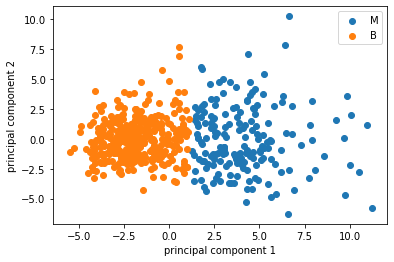

In [64]:
df01= df2[df2.cluster==0]
df02= df2[df2.cluster==1]

plt.scatter(df01['principal component 1'], df01['principal component 2'])
plt.scatter(df02['principal component 1'], df02['principal component 2'])


plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.legend('MB')

# Elbow Plot

In [65]:
sse = [] # SSE means sum of squared error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2[['principal component 1','principal component 2']])
    sse.append(km.inertia_)

In [66]:
sse

[8537.83650140606,
 4036.9973798259875,
 2956.6478321570135,
 2408.3466365993263,
 1961.460170856564,
 1664.2041774690633,
 1495.4156005324041,
 1296.7558390583122,
 1178.6923576555716]

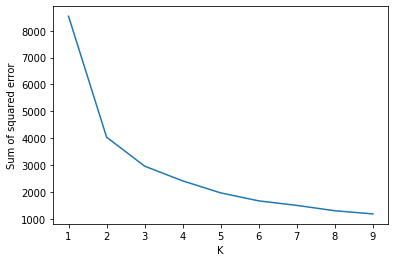

In [67]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)